# Moded code for BTL_AI - 75% code ported

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np # linear algebra
from mnist import MNIST

from time import perf_counter
import os

## Load the data

In [2]:
os.path.abspath('./mnistdb')

mnistdt = MNIST(os.path.abspath('./mnistdb'))
img_arr_test, lb_arr_test = mnistdt.load_training()
img_arr_train, lb_arr_train = mnistdt.load_testing()

## Init the data and-pre processing It

### reusueable funtions to prepare the data

In [10]:
def resize(img):
    return np.reshape(img, [-1, 28, 28, 1])

def normalize(X):
    return X/255

def onehot_encoding(y):
    return np.eye(np.max(y)+1)[y]

def add_bias(X):
    return np.insert(X, 0, 1, axis=1)

def init_weight(X_col_size, y_size):
    return np.zeros(shape=(y_size, X_col_size -1)) # X_col_size not include bias row 

### pre-processing data

In [81]:
img_test = resize(img_arr_test)
img_train = resize(img_arr_train)

# pre add everything
X_train =  normalize(np.array(img_arr_train))
X_test = normalize(np.array(img_arr_test))
# y_train = onehot_encoding(np.array(lb_arr_train))
# y_test = onehot_encoding(lb_arr_test)

y_train = np.array(lb_arr_train)
y_test = np.array(lb_arr_test)


In [82]:
np.shape(img_arr_test)

(60000, 784)

## Data classification

### Softmax 

In [83]:
class MultiClassLogisticRegression:
    
    def __init__(self, n_iter, lr, i_Acc):
        self.n_iter = n_iter     #Vong lap
        self.isBreak =  0.0001     #do chenh lenh dung
        self.lr =  lr  #Learning rate
        self.i_Acc = i_Acc

    def fit(self, X, y, X_val, y_val): 
        self.classes = np.unique(y)   #lay ra all cac du lieu khac nhau cua y giong nhu set
        self.class_labels = {c:i for i,c in enumerate(self.classes)}   #dan nhan cho tuong class
        X, y = self.ADCT(X, y)  #CT trong giao trinh
        X_val, y_val = self.ADCT(X_val, y_val)
        self.loss_train = []
        self.error_train = []
        self.loss_test = [] 
        self.error_test = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))  #(10x784) 
        self.gradient_descent(X, y,  X_val, y_val)
        return self
    
    def ADCT(self, x, y):
        x = self.add_bias(x)  #CT trong giao trinh
        y = self.one_hot(y)   #CT trong giao trinh
        return x, y
 
    def gradient_descent(self, X, y, X_val, y_val):
          start = perf_counter()
          j = 0
          for i in range(self.n_iter):
            
            self.multinomial_logreg_error(X, y, X_val, y_val)
            update = self.multinomial_logreg_grad_i(X, y)
            self.weights += update
            if np.abs(update).max() < self.isBreak: 
                break
            if i % self.i_Acc == 0: 
                
                message = 'Loop {},  Loss_train {},  Acc_train {}, Loss_test {}, Acc_test {}'.format(i+1,self.loss_train[i], self.error_train[i], self.loss_test[i], self.error_test[i])
                j += 1
                print(message)
          end = perf_counter()
          time = int(end) - int(start)
          print('Chuong trinh chay mat: {} s'.format(time))
     
    def multinomial_logreg_error(self, X, y, X_val, y_val):
          self.loss_train.append(self.multinomial_logreg_loss_i(y, self.predict(X)))
          self.error_train.append(self.evaluate(X, y))
          self.loss_test.append(self.multinomial_logreg_loss_i(y_val, self.predict(X_val)))
          self.error_test.append(self.evaluate(X_val, y_val))
    
    def predict(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def CheckModel(self, X, number):
        print('Dự đoán cua X_test[{}] la: {}'.format(number, self.predict_class(X)[number]))
        
        plt.imshow(X_test[number].reshape(28,28), cmap='gray')
        plt.show()

    def predict_class(self, X):
        X_add = self.predict(self.add_bias(X))   #Xac suat
        return np.argmax(X_add, axis=1)

    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def one_hot(self, y):
        return np.eye(len(self.classes))[(y).reshape(-1)]
    
    def evaluate(self, X, y):
        return np.mean(np.argmax(self.predict(X), axis=1) == np.argmax(y, axis=1))
    
    #cross_entropy
    def multinomial_logreg_loss_i(self, y, probs):
        return -(np.mean(y * np.log(probs)))

    def score(self, X, y):
        return np.mean(self.predict_class(X) == y)

    def multinomial_logreg_grad_i(self, X, y):
        error = y - self.predict(X)
        return (self.lr * np.dot(error.T, X))
    

Loop 1,  Loss_train 0.23025850929940458,  Acc_train 0.098, Loss_test 0.23025850929940433, Acc_test 0.09871666666666666
Loop 11,  Loss_train 0.09274982761646215,  Acc_train 0.777, Loss_test 0.09684620923464225, Acc_test 0.7626166666666667
Loop 21,  Loss_train 0.056027020742564576,  Acc_train 0.8204, Loss_test 0.06150368228517593, Acc_test 0.8010166666666667
Loop 31,  Loss_train 0.0407000981757175,  Acc_train 0.8819, Loss_test 0.046663963116460996, Acc_test 0.8622666666666666
Loop 41,  Loss_train 0.03605998136829538,  Acc_train 0.9008, Loss_test 0.04217300165728041, Acc_test 0.8807
Loop 51,  Loss_train 0.034307440230928854,  Acc_train 0.9051, Loss_test 0.04064327421577704, Acc_test 0.8858
Loop 61,  Loss_train 0.03301145487070379,  Acc_train 0.9095, Loss_test 0.03957250755087033, Acc_test 0.8887833333333334
Loop 71,  Loss_train 0.031970935836651164,  Acc_train 0.9117, Loss_test 0.03874499329487194, Acc_test 0.8910166666666667
Loop 81,  Loss_train 0.03110615118640057,  Acc_train 0.9141, Lo

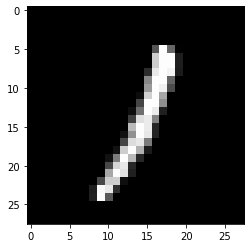

0.8949333333333334

In [84]:
lr = MultiClassLogisticRegression(n_iter = 100, lr=0.0001, i_Acc=10)
lr.fit(X_train,y_train, X_test, y_test)

lr.CheckModel(X_test, 99)
lr.score(X_test, y_test)

In [8]:
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

NameError: name 'model' is not defined

In [129]:
# class MultiClassLogisticRegression:
#     def __init__(self, X, y, iteration, learning_rate, accurate):
#         self.X = X
#         self.y = y
#         self.iter = iteration
#         self.lr = learning_rate
#         self.accu = accurate
#         self.isBreak = 0.0001
#         self.w, = init_weight(X_train.shape[1], y_test[0].size) 

    
#     def fit(self, X_test, y_test):
#         self.loss_train = []
#         self.error_train = []
#         self.loss_test = [] 
#         self.error_test = []
#         self,gradient_decenst(X_test, y_test)

#     # re-implement this
#     def gradient_descent(self, X_test, y_test):
#         start = perf_counter()
#         j = 0
#         self.X
#         self.y
#         for i in range(self.n_iter):
#             self.multinomial_logreg_error(X_test, y_test)
#             update = self.multinomial_logreg_grad_i()
#             self.weights += update
#             if np.abs(update).max() < self.isBreak: 
#                 break
#             if i % self.i_Acc == 0:     
#                 message = 'Loop {},  Loss_train {},  Acc_train {}, Loss_test {}, Acc_test {}'.format(i+1,self.loss_train[i], self.error_train[i], self.loss_test[i], self.error_test[i])
#                 j += 1
#                 print(message)
        
#         end = perf_counter()
#         time = int(end) - int(start)
#         print('Chuong trinh chay mat: {} s'.format(time))
    
#     def multinomial_logreg_grad_i(self,):
#         error = self.y - self.predict(self.X)
#         return (self.lr * np.dot(error.T, X))
    
#     def softmax(self, z):
#         return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

#     def CheckModel(self, X_test, position):
#         print('Dự đoán cua X_test[{}] la: {}'.format(position, self.predict_class(X_test)[position]))
#         plt.imshow(X_test[position].reshape(28,28), cmap='gray')
#         plt.show()

#     def predict_class(self, X_test ):
#         X_add = self.predict(self.add_bias(X))   #Xac suat
#         return np.argmax(X_add, axis=1)

#     def multinomial_logreg_loss_i(self, y, probs):
#         return -(np.mean(y * np.log(probs)))

#     def score(self, X_test, y_test):
#         return np.mean(self.predict_class(X_test) == y_test)

# Run configuration: